<b>True Positive (TP):</b> It refers to the number of predictions where the classifier correctly predicts the positive class as positive.
<br>
<br>
<b>True Negative (TN):</b> It refers to the number of predictions where the classifier correctly predicts the negative class as negative.
<br>
<br>
<b>False Positive (FP):</b> It refers to the number of predictions where the classifier incorrectly predicts the negative class as positive.
<br>
<br>
<b>False Negative (FN):</b> It refers to the number of predictions where the classifier incorrectly predicts the positive class as negative.
<br>
<br>
<table>
<caption>Confusion Matrix
<th></th><th>True</th><th>False</th>
<tr><td><b>Positive</b></td><td>TP</td><td>FP</td></tr>
<tr><td><b>Negative</b></td><td>FN</td><td>TN</td></tr>
</table>
<br>
<b>Accuracy:</b><br> It gives you the overall accuracy of the model, meaning the fraction of the total samples that were correctly classified by the classifier. To calculate accuracy, use the following formula: (TP+TN)/(TP+TN+FP+FN).
<br>
<br>
<b>Precision:</b><br> It tells you what fraction of predictions as a positive class were actually positive. To calculate precision, use the following formula: TP/(TP+FP).
<br>
<br>
<b>Recall/Sensitivity:</b><br> It tells you what fraction of all positive samples were correctly predicted as positive by the classifier. It is also known as True Positive Rate (TPR), Sensitivity, Probability of Detection. To calculate Recall, use the following formula: TP/(TP+FN).
<br>
<br>
<b>Specificity:</b><br> It tells you what fraction of all negative samples are correctly predicted as negative by the classifier. It is also known as True Negative Rate (TNR). To calculate specificity, use the following formula: TN/(TN+FP).
<br>
<br>
<b>F1-score:</b><br> It combines precision and recall into a single measure. Mathematically it’s the harmonic mean of precision and recall. It can be calculated as follows: 2TP/(2TP+FP+FN)

In [1]:
import pandas as pd
import numpy as np

In [2]:

data = 'https://raw.githubusercontent.com/RafsanJany-44/Thesis_Project/main/All_DATA/without_sn_and_Epoch/EEG_HMC.csv'
dataset = pd.read_csv(data)

In [3]:
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train =sc.fit_transform(X_train)

X_test =sc.fit_transform(X_test)

In [6]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=20, random_state=0)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)

______________________________________________________________________________________________________

In [7]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

[[ 1287  1120    24   428  1048]
 [  452 10894   767   354   504]
 [   21  1684  5153     8   141]
 [  443  1341    47  3470   212]
 [  461   232    12    44  5642]]
              precision    recall  f1-score   support

          N1       0.48      0.33      0.39      3907
          N2       0.71      0.84      0.77     12971
          N3       0.86      0.74      0.79      7007
           R       0.81      0.63      0.71      5513
           W       0.75      0.88      0.81      6391

    accuracy                           0.74     35789
   macro avg       0.72      0.68      0.69     35789
weighted avg       0.74      0.74      0.73     35789

Accurecy:  0.7389421330576434


_____________________________________________________________________________________________________

#Heat map

Text(114.0, 0.5, 'Truth')

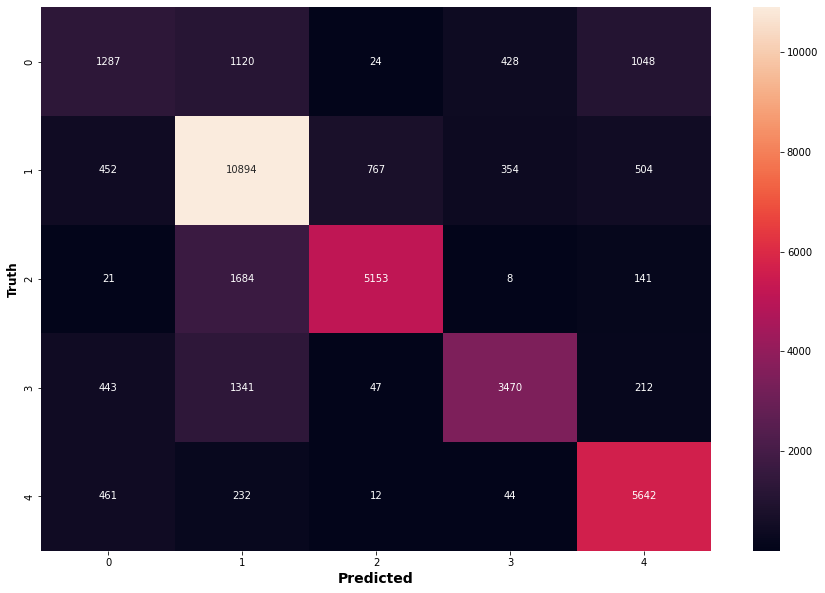

In [8]:

cm = confusion_matrix(y_test, y_pred)
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize = (15,10))
sn.heatmap(cm, annot=True, fmt='d') # here, cm is called to be visualized
plt.xlabel('Predicted',fontsize=14.0, fontweight='bold')
plt.ylabel('Truth',fontsize=12.0, fontweight='bold')

_________________________________________________________________________________________

#Calculating per class

In [9]:

labels = list(set(y_test))
labels.sort()

print("Total labels: %s -> %s" % (len(labels), labels))


Total labels: 5 -> ['N1', 'N2', 'N3', 'R', 'W']


In [10]:
df = pd.DataFrame(
    data=confusion_matrix(y_test, y_pred, labels=labels),
    columns=labels,
    index=labels
)
df

,N1,N2,N3,R,W
N1,1287,1120,24,428,1048
N2,452,10894,767,354,504
N3,21,1684,5153,8,141
R,443,1341,47,3470,212
W,461,232,12,44,5642


In [12]:
#
# Local (metrics per class)
#
tps = {}
fps = {}
fns = {}
tns = {}

precision_local = {}
recall_local = {}
f1_local = {}
accuracy_local = {}
specificity_local={}

for label in labels:
    tps[label] = df.loc[label, label]
    fps[label] = df[label].sum() - tps[label]
    fns[label] = df.loc[label].sum() - tps[label]
    tns[label]=len(y_test) - (tps[label] + fps[label] + fns[label])
    
    tp, fp, fn, tn = tps[label], fps[label], fns[label], tns[label]
    
    precision_local[label] = tp / (tp + fp) if (tp + fp) > 0. else 0.
    specificity_local[label] = tn / (tn + fp) if (tn + fp) > 0. else 0.
    recall_local[label] = tp / (tp + fn) if (tp + fp) > 0. else 0.
    p, r = precision_local[label], recall_local[label]
    
    f1_local[label] = 2. * p * r / (p + r) if (p + r) > 0. else 0.
    accuracy_local[label] = tp / (tp + fp + fn) if (tp + fp + fn) > 0. else 0.



print("#-- Local measures --#")
print("True Positives(TP):", tps)
print("False Positives(FP):", fps)
print("True Negatives(TN):", tns)
print("False Negatives(FN):", fns)
print("----------------------------")

print("Precision:", precision_local)
print("Recall/Sensitivity:", recall_local)
print("Specificity:",specificity_local)
print("F1-Score:", f1_local)
print("Accuracy:", accuracy_local)

#-- Local measures --#
True Positives(TP): {'N1': 1287, 'N2': 10894, 'N3': 5153, 'R': 3470, 'W': 5642}
False Positives(FP): {'N1': 1377, 'N2': 4377, 'N3': 850, 'R': 834, 'W': 1905}
True Negatives(TN): {'N1': 30505, 'N2': 18441, 'N3': 27932, 'R': 29442, 'W': 27493}
False Negatives(FN): {'N1': 2620, 'N2': 2077, 'N3': 1854, 'R': 2043, 'W': 749}
----------------------------
Precision: {'N1': 0.4831081081081081, 'N2': 0.7133782987361665, 'N3': 0.8584041312676994, 'R': 0.8062267657992565, 'W': 0.7475818205909633}
Recall/Sensitivity: {'N1': 0.3294087535193243, 'N2': 0.839873564104541, 'N3': 0.735407449693164, 'R': 0.6294213676764012, 'W': 0.882803943044907}
Specificity: {'N1': 0.9568094849758484, 'N2': 0.8081777544044175, 'N3': 0.9704676533944827, 'R': 0.9724534284581847, 'W': 0.9351996734471733}
F1-Score: {'N1': 0.391721199208644, 'N2': 0.7714751079951845, 'N3': 0.7921598770176785, 'R': 0.706936946113884, 'W': 0.8095853063567227}
Accuracy: {'N1': 0.2435654806964421, 'N2': 0.6279686419183768,

In [13]:
#
# Global
#
micro_averages = {}
macro_averages = {}

correct_predictions = sum(tps.values())
true_negative=sum(tns.values())

den = sum(list(tps.values()) + list(fps.values()))
micro_averages["Precision"] = 1. * correct_predictions / den if den > 0. else 0.

den = sum(list(tps.values()) + list(fns.values()))
micro_averages["Recall"] = 1. * correct_predictions / den if den > 0. else 0.

den = sum(list(tns.values()) + list(fps.values()))
micro_averages["Specificity"] = 1. * true_negative / den if den > 0. else 0.


micro_avg_p, micro_avg_r = micro_averages["Precision"], micro_averages["Recall"]
micro_averages["F1-score"] = 2. * micro_avg_p * micro_avg_r / (micro_avg_p + micro_avg_r) if (micro_avg_p + micro_avg_r) > 0. else 0.

macro_averages["Precision"] = np.mean(list(precision_local.values()))
macro_averages["Recall"] = np.mean(list(recall_local.values()))
macro_averages["Specificity"]=np.mean(list(specificity_local.values()))


macro_avg_p, macro_avg_r = macro_averages["Precision"], macro_averages["Recall"]
macro_averages["F1-Score"] = 2. * macro_avg_p * macro_avg_r / (macro_avg_p + macro_avg_r) if (macro_avg_p + macro_avg_r) > 0. else 0.

total_predictions = df.values.sum()
accuracy_global = correct_predictions / total_predictions if total_predictions > 0. else 0.

print("#-- Global measures --#")
print("Micro-Averages:", micro_averages)
print("Macro-Averages:", macro_averages)
print("Correct predictions:", correct_predictions)
print("Total predictions:", total_predictions)
print("Accuracy:", accuracy_global)

#-- Global measures --#
Micro-Averages: {'Precision': 0.7389421330576434, 'Recall': 0.7389421330576434, 'Specificity': 0.9347355332644108, 'F1-score': 0.7389421330576434}
Macro-Averages: {'Precision': 0.7217398249004388, 'Recall': 0.6833830156076675, 'Specificity': 0.9286215989360214, 'F1-Score': 0.7020378913579638}
Correct predictions: 26446
Total predictions: 35789
Accuracy: 0.7389421330576434


In [14]:
accuracy_local_new = {}
for label in labels:
    tp, fp, fn, tn = tps[label], fps[label], fns[label], tns[label]
    accuracy_local_new[label] = (tp + tn) / (tp + fp + fn + tn) if (tp + fp + fn + tn) > 0. else 0.

total_true = sum(list(tps.values()) + list(tns.values()))
total_predictions = sum(list(tps.values()) + list(tns.values()) + list(fps.values()) + list(fns.values()))
accuracy_global_new = 1. * total_true / total_predictions if total_predictions > 0. else 0.

print("Accuracy (per class), with TNs:", accuracy_local_new)
print("Accuracy (per class), without TNs:", accuracy_local)
print("Accuracy (global), with TNs:", accuracy_global_new)
print("Accuracy (global), without TNs:", accuracy_global)

Accuracy (per class), with TNs: {'N1': 0.8883176394981698, 'N2': 0.8196652602755037, 'N3': 0.9244460588448965, 'R': 0.9196121713375618, 'W': 0.925843136159155}
Accuracy (per class), without TNs: {'N1': 0.2435654806964421, 'N2': 0.6279686419183768, 'N3': 0.6558482881506936, 'R': 0.5467149834567512, 'W': 0.6800867888138862}
Accuracy (global), with TNs: 0.8955768532230574
Accuracy (global), without TNs: 0.7389421330576434


_____________________________________________________________________________________________

#Function

In [11]:
def confusion_details(y_test,y_pred):
    labels = list(set(y_test))
    labels.sort()

    print("Total labels: %s -> %s" % (len(labels), labels))

    df = pd.DataFrame(
        data=confusion_matrix(y_test, y_pred, labels=labels),
        columns=labels,
        index=labels
    )

    print(df)

    print()
    print("----------------------------------------------------------------------------------------")
    print("----------------------------------------------------------------------------------------")
    print()
    #
    # Local (metrics per class)
    #
    tps = {}
    fps = {}
    fns = {}
    tns = {}

    precision_local = {}
    recall_local = {}
    f1_local = {}
    accuracy_local = {}
    specificity_local={}

    for label in labels:
        tps[label] = df.loc[label, label]
        fps[label] = df[label].sum() - tps[label]
        fns[label] = df.loc[label].sum() - tps[label]
        tns[label]=len(y_test) - (tps[label] + fps[label] + fns[label])
        
        tp, fp, fn, tn = tps[label], fps[label], fns[label], tns[label]
        
        precision_local[label] = tp / (tp + fp) if (tp + fp) > 0. else 0.
        specificity_local[label] = tn / (tn + fp) if (tn + fp) > 0. else 0.
        recall_local[label] = tp / (tp + fn) if (tp + fp) > 0. else 0.
        p, r = precision_local[label], recall_local[label]
        
        f1_local[label] = 2. * p * r / (p + r) if (p + r) > 0. else 0.
        accuracy_local[label] = tp / (tp + fp + fn) if (tp + fp + fn) > 0. else 0.



    print("#-- Local measures --#")
    print("True Positives(TP):", tps)
    print("False Positives(FP):", fps)
    print("True Negatives(TN):", tns)
    print("False Negatives(FN):", fns)
    print("----------------------------")

    print("Precision:", precision_local)
    print("Recall/Sensitivity:", recall_local)
    print("Specificity:",specificity_local)
    print("F1-Score:", f1_local)
    print("Accuracy:", accuracy_local)


    print()
    print("----------------------------------------------------------------------------------------")
    print("----------------------------------------------------------------------------------------")
    print()
    #
    # Global
    #
    micro_averages = {}
    macro_averages = {}

    correct_predictions = sum(tps.values())
    true_negative=sum(tns.values())

    den = sum(list(tps.values()) + list(fps.values()))
    micro_averages["Precision"] = 1. * correct_predictions / den if den > 0. else 0.

    den = sum(list(tps.values()) + list(fns.values()))
    micro_averages["Recall"] = 1. * correct_predictions / den if den > 0. else 0.

    den = sum(list(tns.values()) + list(fps.values()))
    micro_averages["Specificity"] = 1. * true_negative / den if den > 0. else 0.


    micro_avg_p, micro_avg_r = micro_averages["Precision"], micro_averages["Recall"]
    micro_averages["F1-score"] = 2. * micro_avg_p * micro_avg_r / (micro_avg_p + micro_avg_r) if (micro_avg_p + micro_avg_r) > 0. else 0.

    macro_averages["Precision"] = np.mean(list(precision_local.values()))
    macro_averages["Recall"] = np.mean(list(recall_local.values()))
    macro_averages["Specificity"]=np.mean(list(specificity_local.values()))


    macro_avg_p, macro_avg_r = macro_averages["Precision"], macro_averages["Recall"]
    macro_averages["F1-Score"] = 2. * macro_avg_p * macro_avg_r / (macro_avg_p + macro_avg_r) if (macro_avg_p + macro_avg_r) > 0. else 0.

    total_predictions = df.values.sum()
    accuracy_global = correct_predictions / total_predictions if total_predictions > 0. else 0.

    print("#-- Global measures --#")
    print("Micro-Averages:", micro_averages)
    print("Macro-Averages:", macro_averages)
    print("Correct predictions:", correct_predictions)
    print("Total predictions:", total_predictions)
    print("Accuracy:", accuracy_global)


    print()
    print("----------------------------------------------------------------------------------------")
    print("----------------------------------------------------------------------------------------")
    print()



    accuracy_local_new = {}
    for label in labels:
        tp, fp, fn, tn = tps[label], fps[label], fns[label], tns[label]
        accuracy_local_new[label] = (tp + tn) / (tp + fp + fn + tn) if (tp + fp + fn + tn) > 0. else 0.

    total_true = sum(list(tps.values()) + list(tns.values()))
    total_predictions = sum(list(tps.values()) + list(tns.values()) + list(fps.values()) + list(fns.values()))
    accuracy_global_new = 1. * total_true / total_predictions if total_predictions > 0. else 0.

    print("Accuracy (per class), with TNs:", accuracy_local_new)
    print("Accuracy (per class), without TNs:", accuracy_local)
    print("Accuracy (global), with TNs:", accuracy_global_new)
    print("Accuracy (global), without TNs:", accuracy_global)

In [16]:
confusion_details(y_test,y_pred)

Total labels: 5 -> ['N1', 'N2', 'N3', 'R', 'W']
      N1     N2    N3     R     W
N1  1287   1120    24   428  1048
N2   452  10894   767   354   504
N3    21   1684  5153     8   141
R    443   1341    47  3470   212
W    461    232    12    44  5642

----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------

#-- Local measures --#
True Positives(TP): {'N1': 1287, 'N2': 10894, 'N3': 5153, 'R': 3470, 'W': 5642}
False Positives(FP): {'N1': 1377, 'N2': 4377, 'N3': 850, 'R': 834, 'W': 1905}
True Negatives(TN): {'N1': 30505, 'N2': 18441, 'N3': 27932, 'R': 29442, 'W': 27493}
False Negatives(FN): {'N1': 2620, 'N2': 2077, 'N3': 1854, 'R': 2043, 'W': 749}
----------------------------
Precision: {'N1': 0.4831081081081081, 'N2': 0.7133782987361665, 'N3': 0.8584041312676994, 'R': 0.8062267657992565, 'W': 0.7475818205909633}
Recall/Sensitivity: {'N1': 0.3294087535193243, 'N2': 0.

In [24]:
import matplotlib.pyplot as plt
from yellowbrick.classifier import ConfusionMatrix
import matplotlib.dates as dates



def Conf_Mat(X_,y_,attb,model,cls):


  fig = plt.figure(figsize=(attb["Fig Height"],attb["Fig weidth"]))
  ax = fig.add_subplot(111)

  cm = ConfusionMatrix(model, classes=cls,fontsize=attb["Confusion Matrix Inner Fontsize"],ax=ax)
  cm.fit(X_train, y_train)
  cm.score(X_, y_)
      
  cm.ax.set_xlabel("Predicted Class", fontsize=attb["X Axis Fontsize"],fontweight="bold")
  cm.ax.set_ylabel("True Class", fontsize=attb["Y Axis Fontsize"],fontweight="bold")
  cm.ax.xaxis.set_tick_params(labelsize=attb["X Label Fontsize"])
  cm.ax.yaxis.set_tick_params(labelsize=attb["Y Label Fontsize"])
  for label in ax.get_xticklabels():
    label.set_fontweight(550)
  for label in ax.get_yticklabels():
    label.set_fontweight(550)
  
  plt.savefig("Testing_confusion_mat"+str(model)+".png")
  cm.show()
  print("--------------------")
  print("--------------------")

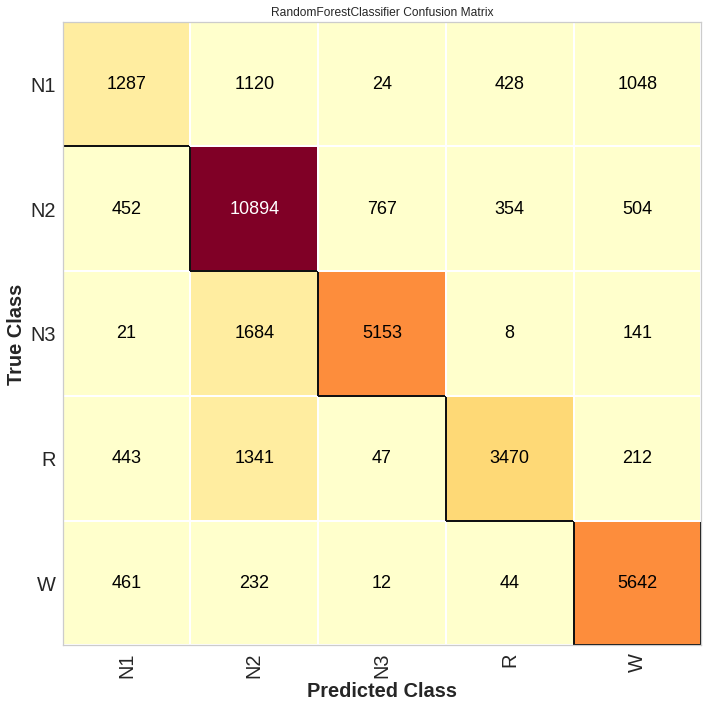

--------------------
--------------------


In [25]:
attributes={
   "Fig Height": 10,
   "Fig weidth": 10, 
    
  "Y Axis Fontsize" : 20,
  "X Axis Fontsize" : 20,

  "Y Label Fontsize" : 20,
  "X Label Fontsize" : 20,

  "Confusion Matrix Inner Fontsize": 18


}

Conf_Mat(X_test,y_test,attributes,classifier,labels)
     

In [ ]:
import pandas as pd

def dfToxl(name,df):
  df.to_excel(name+".xlsx", index=False)
  print("Dictionary converted into excel...")

def dicToxl(name,dic):
  dataframe = pd.DataFrame(data=[dic])
  dataframe.to_excel(name+".xlsx", index=False)
  print("Dictionary converted into excel...")

